In [12]:
from __future__ import unicode_literals
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Adinath\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-226a774ea485>", line 8, in <module>
    from sklearn.cross_validation import train_test_split
ModuleNotFoundError: No module named 'sklearn.cross_validation'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Adinath\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Adinath\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context,

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [14]:
data = pd.read_csv("C:/Users/Adinath/Desktop/Data_Science/Assignments/Logistic Regression/affairs.csv")
data.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


In [15]:
# Load dataset
train = sm.datasets.fair.load_pandas().data

# Add 'affair' column: 1 rpresents having affair, 0 doesn't
train['affair'] = (train.affairs > 0).astype(int)

In [16]:
train.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


We can see that on average, women who have affairs rate their marriages lower, which is to be expected. Let's take another look at the rate_marriage variable.


In [17]:
train.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


An increase in age, yrs_married, and children appears to correlate with a declining marriage rating.

In [18]:
#Data visualization
# show plots in the notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


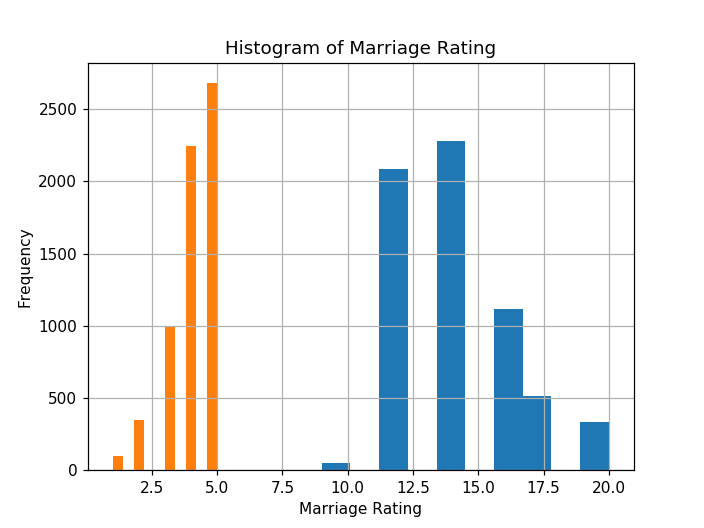

Text(0, 0.5, 'Frequency')

In [19]:
# histogram of education
train.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

In [20]:
# histogram of marriage rating
train.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(32.19444598754247, 0.5, 'Frequency')

<IPython.core.display.Javascript object>


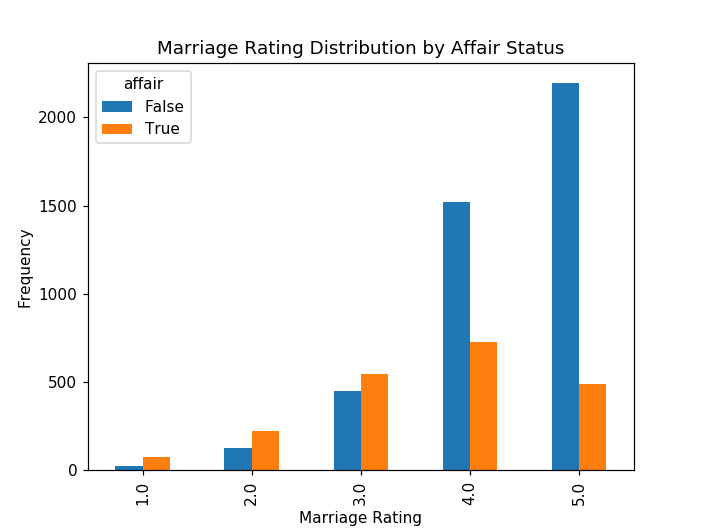

Text(0, 0.5, 'Frequency')

In [21]:
#Let's take a look at the distribution of marriage ratings for those having affairs versus those not having affairs.
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(train.rate_marriage, train.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

<IPython.core.display.Javascript object>


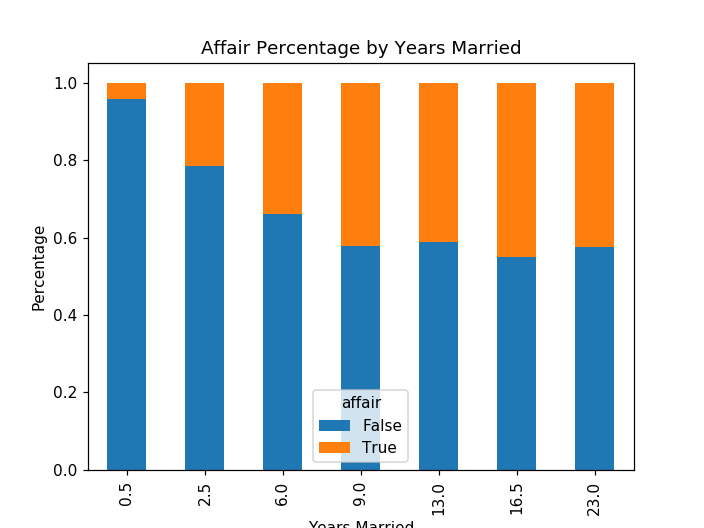

Text(0, 0.5, 'Percentage')

In [22]:
#Let's use a stacked barplot to look at the percentage of women having affairs by number of years of marriage.
affair_yrs_married = pd.crosstab(train.yrs_married, train.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

Prepare Data for Logistic Regression
To prepare the data, I want to add an intercept column as well as dummy variables for occupation and occupation_husb, since I'm treating them as categorial variables. The dmatrices function from the patsy module can do that using formula language.

In [23]:
train.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [25]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', train, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [26]:
#The column names for the dummy variables are ugly, so let's rename those.
# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [28]:
#We also need to flatten y into a 1-D array, so that scikit-learn will properly understand it as the response variable.
# flatten y into a 1-D array
y = np.ravel(y)

Logistic Regression

In [29]:
#Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

C:\Users\Adinath\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7257304429783223

In [30]:
#73% accuracy seems good, but what's the null error rate?
# what percentage had affairs?
y.mean()

0.3224945020420987

In [31]:
#Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting "no". So we're doing better than the null error rate, but not by much.

#Let's examine the coefficients to see what we learn
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[1.4434680078354816]
1,occ_2,[0.12256504135405052]
2,occ_3,[0.3725141029378872]
3,occ_4,[0.11646624432495874]
4,occ_5,[0.7138598638624442]
5,occ_6,[0.3316490198492876]
6,occ_husb_2,[0.28231716874558305]
7,occ_husb_3,[0.4049551289981738]
8,occ_husb_4,[0.24633806731847224]
9,occ_husb_5,[0.2803183651722345]
